In [1]:
# Import all the usual stuff
import numpy as np
pi = np.pi 
import scipy as sp
from scipy import signal
from random import *
import matplotlib.pyplot as plt
# Matplotlib in inline mode
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
N = 1000
t = np.linspace(0,1,N)
x = sp.signal.chirp(t,1,0.5,20) #exemple d'un signal

sigma = 0.1
x_bruit = x + np.random.normal(0, sigma, x.size) #ajout d'un bruit blanc gaussien

x_hat = np.fft.fftshift(np.fft.fft(x)) #TFD du signal avec basses fréquences centrées
x_bruit_hat = np.fft.fftshift(np.fft.fft(x_bruit)) #TFD du signal bruité avec basses fréquences centrées

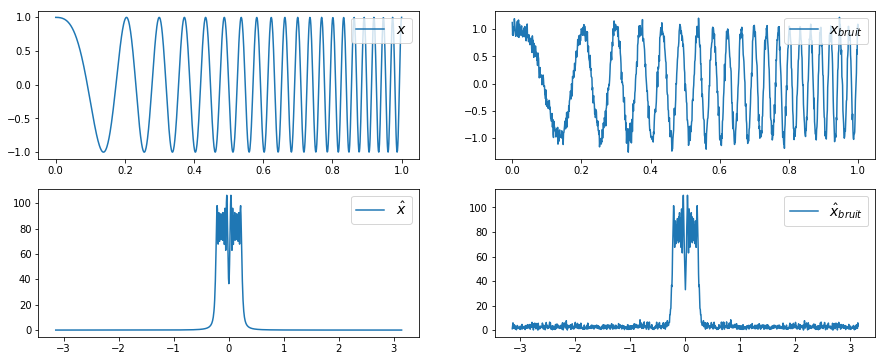

In [3]:
plt.figure(figsize=(15,6))
plt.subplot(221)
plt.plot(t,x,label=r'$x$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(222)
plt.plot(t,x_bruit,label=r'$x_{bruit}$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(223)
plt.plot(np.linspace(-pi,pi,x.size),abs(x_hat),label=r'$\hat{x}$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(224)
plt.plot(np.linspace(-pi,pi,x.size),abs(x_bruit_hat),label=r'$\hat{x}_{bruit}$')
plt.legend(loc='upper right',fontsize=14)

In [4]:
# Filtre moyenneur
M = 11
k = np.linspace(-0.5,0.5,x.size) #fréquences réduites
omega = 2*pi*k #pulsations
h_hat = (1/M)*(np.sin(M*omega/2)/np.sin(omega/2))*np.exp(-1j*omega*(M-1)/2) #filtre moyenneur dans Fourier
#h_hat = (1/M)*(1-np.exp(-1j*2*pi*k*M))/(1-np.exp(-1j*2*pi*k)) #Expression équivalente du filtre moyenneur dans Fourier

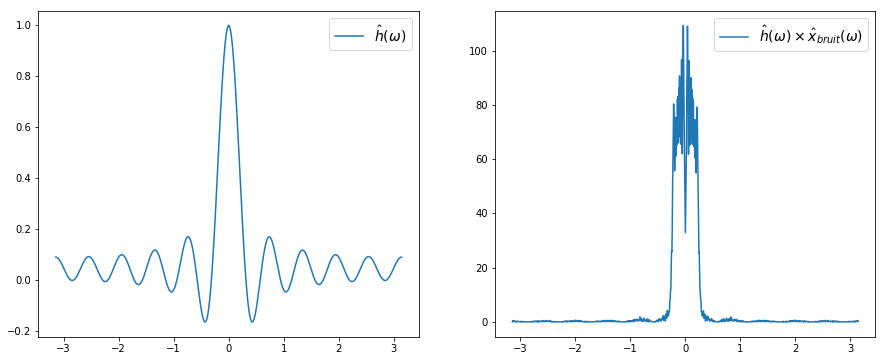

In [5]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(np.linspace(-pi,pi,x.size),h_hat,label=r'$\hat{h}(\omega)$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(122)
plt.plot(np.linspace(-pi,pi,x.size),abs(x_bruit_hat * h_hat),label=r'$\hat{h}(\omega) \times \hat{x}_{bruit}(\omega)$')
plt.legend(loc='upper right',fontsize=14)

In [6]:
x_debruite = np.fft.ifft(np.fft.fftshift(x_bruit_hat * h_hat)) #iTFD pour reconstruire le signal débruité par h
#x_debruite2 = np.convolve(x_bruit,np.pad(1/M*np.ones(M),(M,0),mode='constant'),'same')

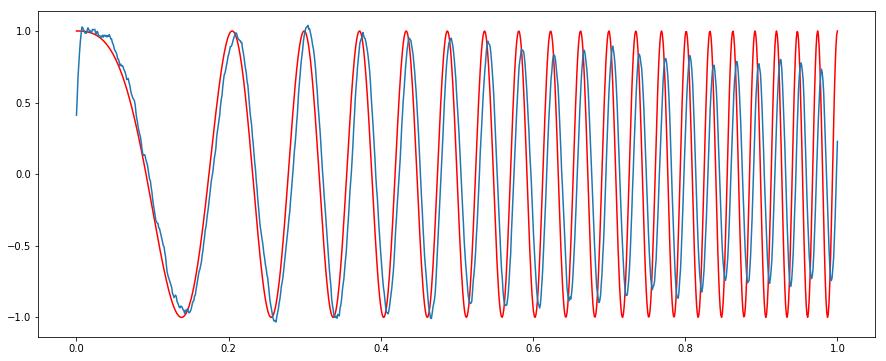

In [7]:
plt.figure(figsize=(15,6))
plt.plot(t,x,'r',label=r'$x_{debruite}$')
plt.plot(t,x_debruite,label=r'$x_{debruite}$')
#plt.plot(t,x_debruite2,'g',label=r'$x_{debruite}$')

On constate un décalage du signal reconstruit par rapport au signal d'origine correspondant à l'influence de la phase du filtre. Le décalage correspond à la moitié de la taille du filtre (M/2)

## Filtre idéal

In [8]:
## Filtre idéal
N = 201
omega = np.linspace(-pi,pi,N) #pulsations
omega_c = pi/8 #fréquence de coupure
h_hat = np.array(abs(omega) <= omega_c, dtype=float) #filtre passe_bas idéal
n = np.arange(-N/2,N/2)
h = (omega_c/pi)*np.sinc((omega_c/pi)*n) #réponse impulsionnelle du filtre passe bas

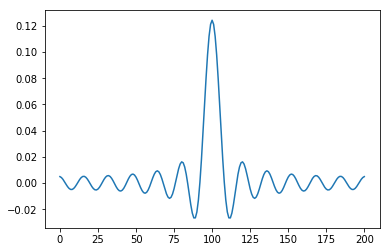

In [9]:
plt.plot(np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(h_hat))))
#réponse impusionnelle calculée numériquement par iTFD
# (le filtre est designé pour des basses fréquences centrées d'où le redécalage des fréquences avec ifftshift)

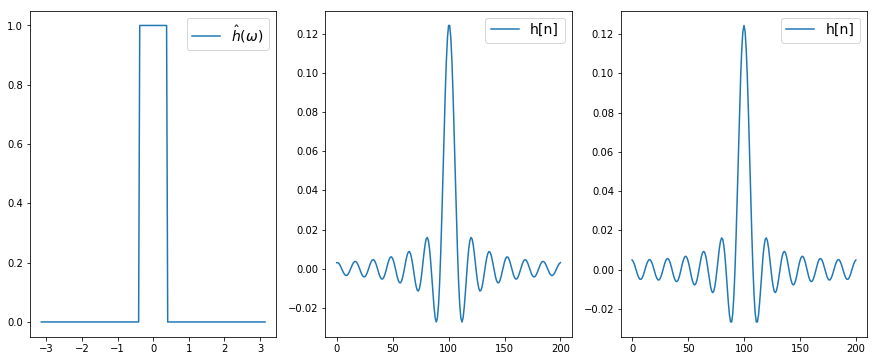

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(np.linspace(-pi,pi,N),h_hat,label=r'$\hat{h}(\omega)$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(132)
plt.plot(h,label=r'h[n]') #réponse impulsionnelle théorique
plt.legend(loc='upper right',fontsize=14)
plt.subplot(133)
plt.plot(np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(h_hat))),label=r'h[n]') #réponse impulsionnelle calculée par iTFD
plt.legend(loc='upper right',fontsize=14)
plt.show()

In [11]:
## approximation Filtre idéal
Mb = 100
h_hat_tronc = (1/N)*np.convolve(h_hat,np.sin(omega*Mb/2)/np.sin(omega/2),'same') 
#réponse fréquentielle théorique d'un filtre RIF passe-bas idéal

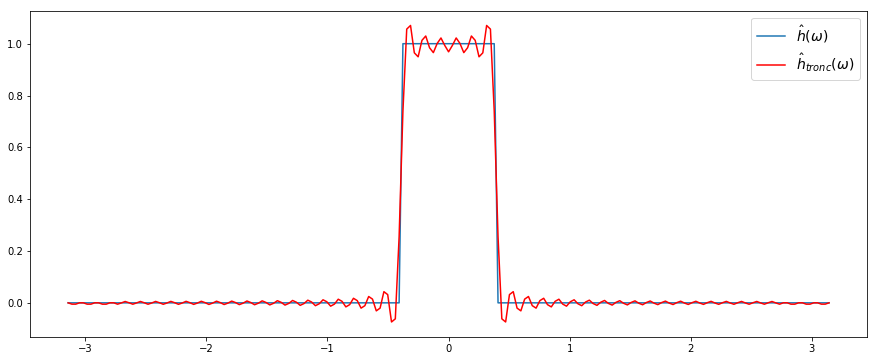

In [12]:
plt.figure(figsize=(15,6))
plt.plot(np.linspace(-pi,pi,h_hat.size),h_hat,label=r'$\hat{h}(\omega)$')
plt.plot(np.linspace(-pi,pi,h_hat.size),h_hat_tronc,'r',label=r'$\hat{h}_{tronc}(\omega)$')
plt.legend(loc='upper right',fontsize=14)

## Construction d'un filtre
Suppression du biais DC, on souhaite couper les fréquences proches de 0

$H(z) = 1-z^{-1}$

$y[n] = x[n] - x[n-1]$

$\hat{h}(\omega) = 1-e^{-i \omega}$

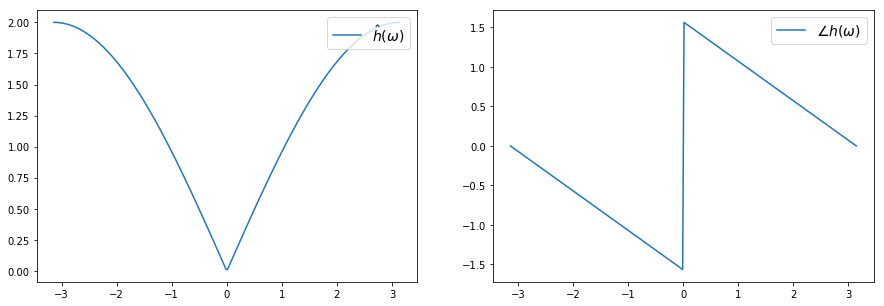

In [13]:
omega = np.linspace(-pi,pi,256)
h_hat = 1-np.exp(-1j*omega)#Filtre Notch 

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(omega,abs(h_hat), label=r'$\hat{h}(\omega)$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(122)
plt.plot(omega,np.unwrap(np.angle(h_hat)),label=r'$\angle{h}(\omega)$')
plt.legend(loc='upper right',fontsize=14)

$H(z) =  \frac{1-z^{-1}}{1-\alpha z^{-1}}$ Transformée en z

$y[n] = x[n] - x[n-1] + \alpha y[n-1]$ Réponse impulsionnelle

$\hat{h}(\omega) = \frac{1-e^{-i \omega}}{1-\alpha e^{-i \omega}}$ Réponse fréquentielle

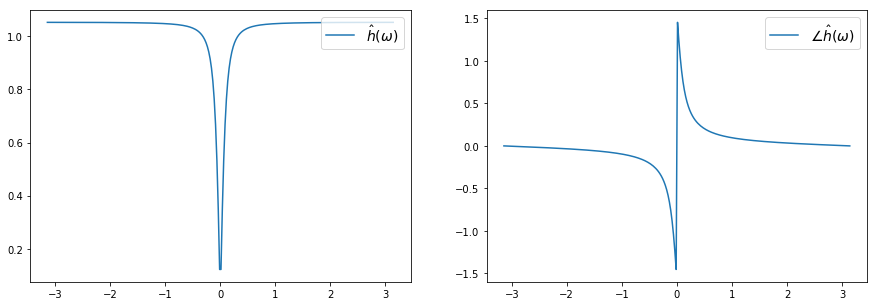

In [14]:
alpha = 0.9 #quand alpha tend vers 1, les poles se rapproche du cercle unité et du zéro créant un effet asymptotique 
h_hat = (1-np.exp(-1j*omega))/(1-alpha * np.exp(-1j*omega)) #Réponse fréquentielle avec l'introduction d'un pole

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(omega,abs(h_hat), label=r'$\hat{h}(\omega)$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(122)
plt.plot(omega,np.unwrap(np.angle(h_hat)),label=r'$\angle{\hat{h}}(\omega)$')
plt.legend(loc='upper right',fontsize=14)

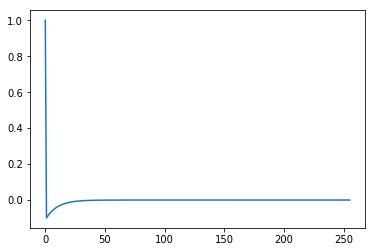

In [15]:
plt.plot(np.fft.ifft(np.fft.ifftshift(h_hat))) #réponse impulsionnelle

## Filtre RII
Comparaison des filtres de Butterworth, Chebyshev I & II et Elliptic

In [16]:
# Fonction zplane permet de tracer les zéros et poles d'un filtre dans la plan complexe.
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict

def zplane(z, p, filename=None):
    """Plot the complex z-plane given zeros and poles.
    """
    
    # get a figure/plot
    ax = plt.subplot(1, 1, 1)

    # Add unit circle and zero axes    
    unit_circle = patches.Circle((0,0), radius=1, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(unit_circle)
    axvline(0, color='0.7')
    axhline(0, color='0.7')
    
    # Plot the poles and set marker properties
    poles = plt.plot(p.real, p.imag, 'x', markersize=9, alpha=0.5)
    
    # Plot the zeros and set marker properties
    zeros = plt.plot(z.real, z.imag,  'o', markersize=9, 
             color='none', alpha=0.5,
             markeredgecolor=poles[0].get_color(), # same color as poles
             )

    # Scale axes to fit
    r = 1.5 * np.amax(np.concatenate((abs(z), abs(p), [1])))
    plt.axis('scaled')
    plt.axis([-r, r, -r, r])

Text(0.5,1,'Poles and zeros')

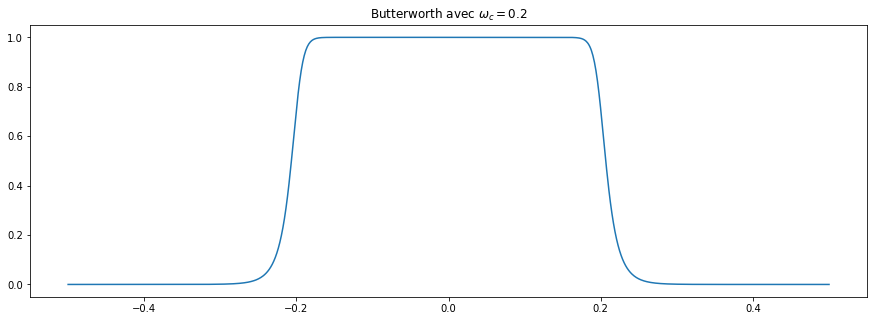

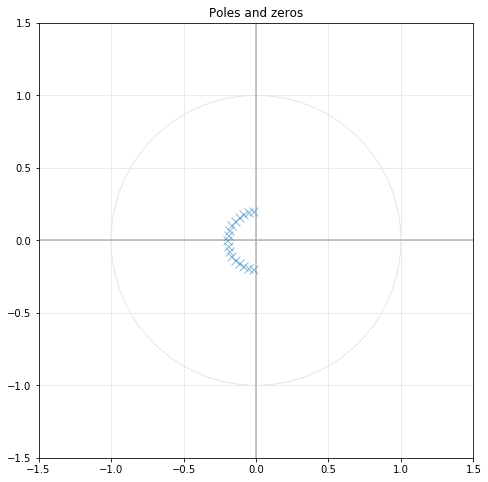

In [17]:
N = 17
omega_c = 0.2
b, a = signal.iirfilter(N, omega_c, btype='lowpass', analog=True, ftype='butter')
p = np.roots(a)
z = np.roots(b)
w, h = signal.freqs(b, a,np.linspace(-1/2,1/2,1000))

plt.figure(figsize=(15,5))
plt.plot(w, abs(h))
plt.title('Butterworth avec $\omega_c = 0.2$')
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
zplane(z, p)
plt.grid(True, color='0.9', linestyle='-', which='both', axis='both')
plt.title('Poles and zeros')

Text(0.5,1,'Poles and zeros')

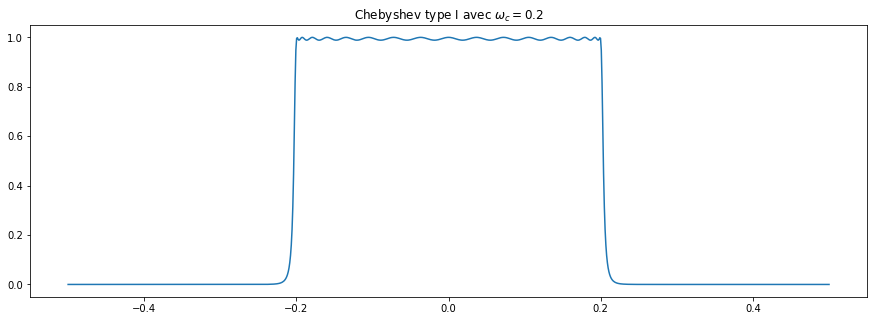

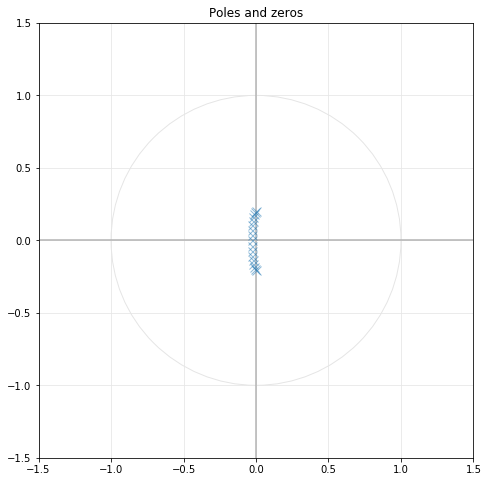

In [18]:
b, a = signal.iirfilter(N, omega_c, rp=0.1, rs=1, btype='lowpass', analog=True, ftype='cheby1')
p = np.roots(a)
z = np.roots(b)

w, h = signal.freqs(b, a,np.linspace(-1/2,1/2,1000))

plt.figure(figsize=(15,5))
plt.plot(w, abs(h))
plt.title('Chebyshev type I avec $\omega_c = 0.2$')
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
zplane(z, p)
plt.grid(True, color='0.9', linestyle='-', which='both', axis='both')
plt.title('Poles and zeros')

In [19]:
N = 21
wc = 0.2 #wc = 2*pi*fc  
rp = 0.5 #ripple en dB càd les oscillations dans la bande passante
rs = 20 #attenuation dB càd les oscillations dans la bande stoppante

b, a = signal.iirfilter(N, wc, btype='lowpass', analog=True, ftype='butter')
w_b, h_b = signal.freqs(b, a,np.linspace(-1/2,1/2,1000))
b, a = signal.iirfilter(N, wc, rp=rp, btype='lowpass', analog=True, ftype='cheby1')
w_c1, h_c1 = signal.freqs(b, a,np.linspace(-1/2,1/2,1000))
b, a = signal.iirfilter(N, wc, rs=rs, btype='lowpass', analog=True, ftype='cheby2')
w_c2, h_c2 = signal.freqs(b, a,np.linspace(-1/2,1/2,1000))
b, a = signal.iirfilter(N, wc, rp=rp, rs=rs, btype='lowpass', analog=True, ftype='ellip')
w_e, h_e = signal.freqs(b, a,np.linspace(-1/2,1/2,1000))

(0.1, 0.6000000000000001)

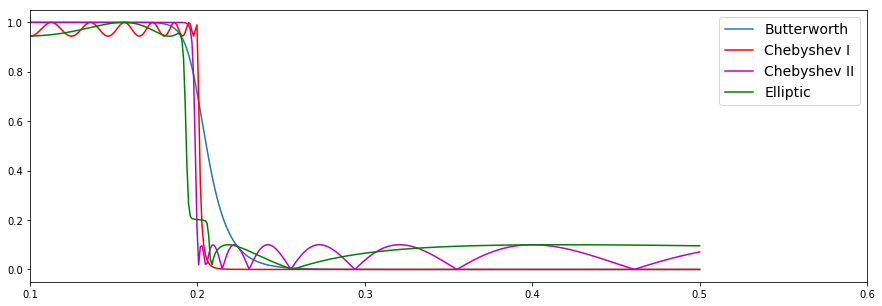

In [20]:
plt.figure(figsize=(15,5))
plt.plot(w_b, abs(h_b),label='Butterworth')
plt.plot(w_c1, abs(h_c1),'r',label='Chebyshev I')
plt.plot(w_c2, abs(h_c2),'m',label='Chebyshev II')
plt.plot(w_e, abs(h_e),'g',label='Elliptic')
plt.legend(loc='upper right',fontsize=14)
plt.xlim(wc-wc/2,3*wc)

(0, 100)

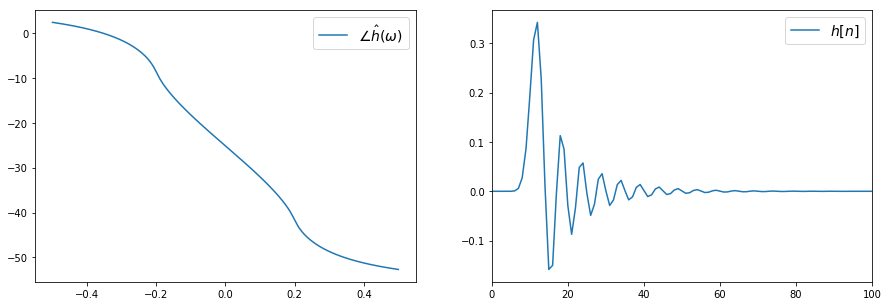

In [21]:
h = h_b
w = w_b
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(w,np.unwrap(np.angle(h)),label=r'$\angle{\hat{h}}(\omega)$')
plt.legend(loc='upper right',fontsize=14)
plt.subplot(122)
plt.plot(np.real(np.fft.ifft(np.fft.ifftshift(h))),label=r'$h[n]$')
plt.legend(loc='upper right',fontsize=14)
plt.xlim(0,100)

Text(0.5,1,'Elliptic (dB)')

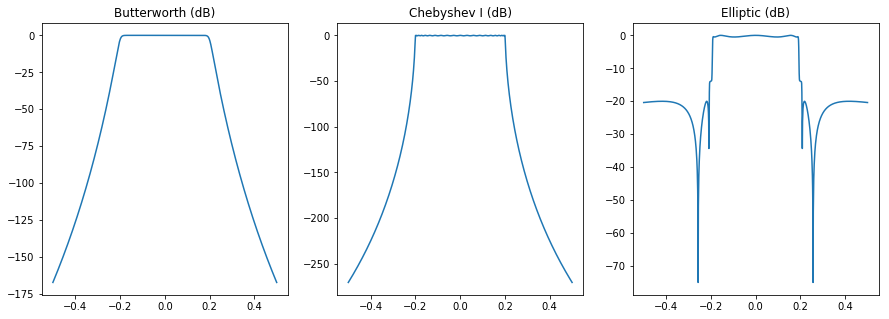

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(w_b,20*np.log10(abs(h_b)))
plt.title('Butterworth (dB)')
plt.subplot(132)
plt.plot(w_c1,20*np.log10(abs(h_c1)))
plt.title('Chebyshev I (dB)')
plt.subplot(133)
plt.plot(w_e,20*np.log10(abs(h_e)))
plt.title('Elliptic (dB)')

## Filtre RIF

In [23]:
N=201
omega_c = 0.2
n = np.linspace(-N/2,N/2,N)
h = (omega_c/pi)*np.sinc((omega_c/pi)*n) #Réponse impulsionnelle du filtre passe-bas idéal
blackman = 0.42-0.5*np.cos(2*pi*(n+N/2)/(N-1))+0.08*np.cos(4*pi*(n+N/2)/(N-1)) #Fenêtre d'apodisation
h_tronc = h*blackman #Réponse impulsionnelle du filtre passe-bas idéal approximé par méthode des fenêtres
#h_tronc = h*sp.signal.blackman(N) #fonction porte pondérée
h_hat = np.fft.fftshift(np.fft.fft(h)) #Réponse fréquentielle du filtre passe-bas idéal
h_hat_tronc = np.fft.fftshift(np.fft.fft(h_tronc)) 
#Réponse fréquentielle du filtre passe-bas idéal approximé par méthode des fenêtres

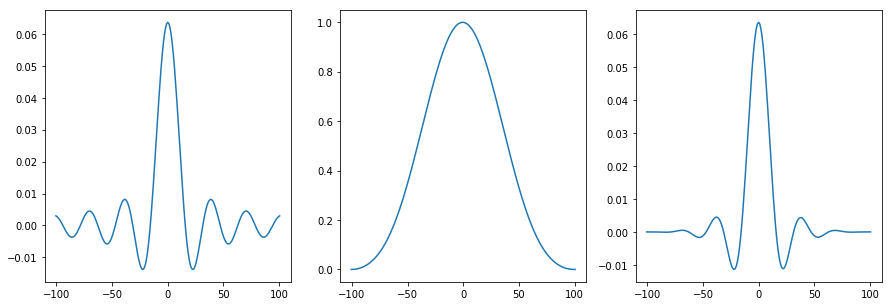

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(n,h)
plt.subplot(132)
plt.plot(n,blackman)
plt.subplot(133)
plt.plot(n,h_tronc)

Text(0.5,1,'Filtre RIF (dB)')

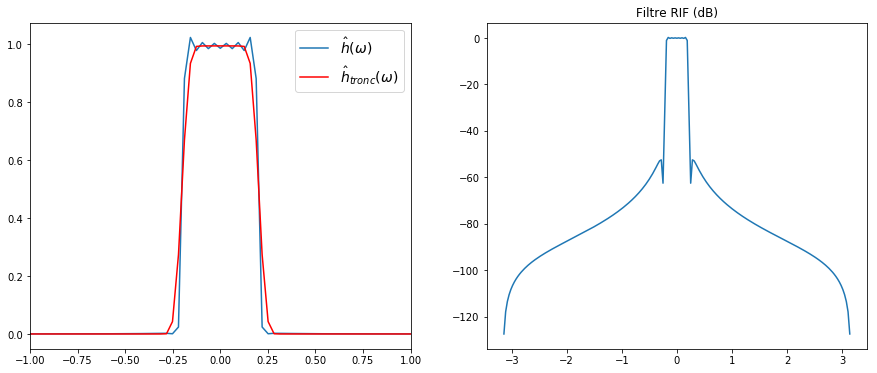

In [25]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(np.linspace(-pi,pi,h_hat.size),abs(h_hat),label=r'$\hat{h}(\omega)$')
plt.plot(np.linspace(-pi,pi,h_hat.size),abs(h_hat_tronc),'r',label=r'$\hat{h}_{tronc}(\omega)$')
plt.legend(loc='upper right',fontsize=14)
plt.xlim(-1,1)
plt.subplot(122)
plt.plot(np.linspace(-pi,pi,h_hat.size),20*np.log10(abs(h_hat)))
plt.title('Filtre RIF (dB)')

In [26]:
h = signal.firwin(N, omega_c,window='blackman')
h_hat = abs(np.fft.fftshift(np.fft.fft(h)))
h_hat /= abs(h_hat).max()

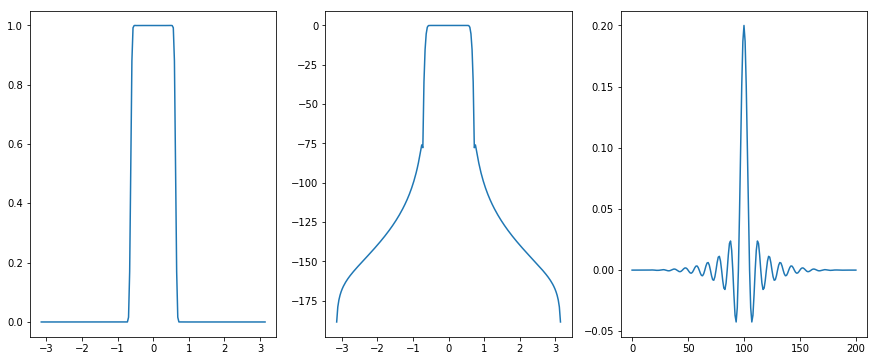

In [27]:
plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(np.linspace(-pi,pi,h_hat.size),h_hat)
plt.subplot(132)
plt.plot(np.linspace(-pi,pi,h_hat.size),20*np.log10(abs(h_hat)))
plt.subplot(133)
plt.plot(h)

Construction d'un filtre RIF optimal par minimax avec l'algorithme de Remez.
Cette méthode permet de construire un filtre RIF en controllant en minimisant les oscillations maximales (minimax) dans la bande passante et stoppante à partir des polynomes de Chebyshev

In [28]:
N = 51
fe = 1      
transition = 0.05      

lowpass_remez = signal.remez(N, [0, omega_c/2, omega_c/2 + transition, 0.5*fe],
                    [1, 0], Hz=fe)
w, h_hat = signal.freqz(lowpass_remez,worN = 3*N)

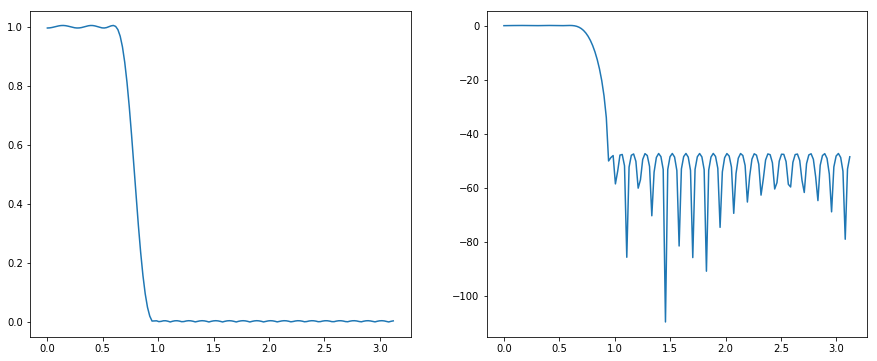

In [29]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(w,abs(h_hat))
plt.subplot(122)
plt.plot(w,20*np.log10(abs(h_hat)))

## Déreverbération

Soit une impulsion $e[n] = \alpha^n u[n]$, $u[n]$ étant la fonction porte, émise plusieurs fois puis réceptionnées

Connaissant $e[n]$, on souhaite connaître les instants de réception.

<StemContainer object of 3 artists>

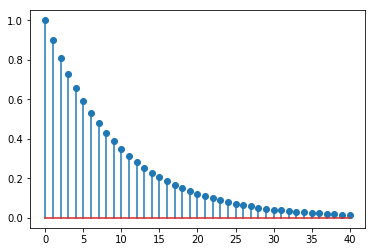

In [126]:
K = 41
k=np.arange(0,K)
alpha = 0.9
e = alpha**k
plt.stem(k,e)

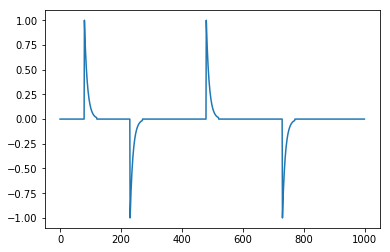

In [132]:
N = 1000
n = np.arange(N)
y = np.zeros(N)
pulse = [1,-1,1,-1]
liste = np.array(np.round([N*0.1,N*0.25,N*0.5,N*0.75]),dtype=int)
y[liste] = pulse
x = np.convolve(y,e,'same')
plt.plot(x)

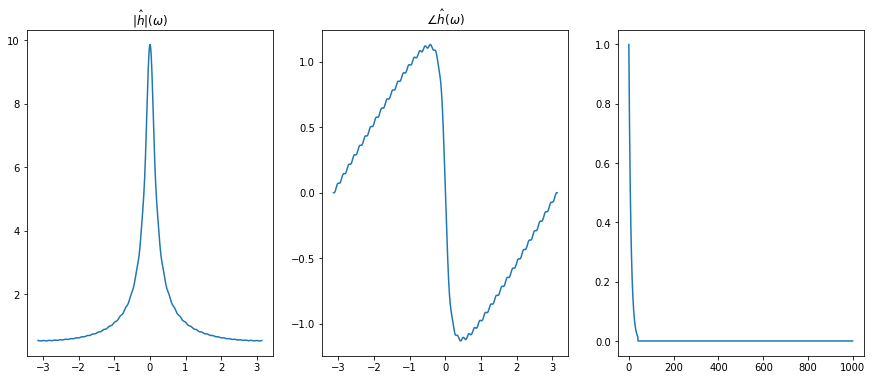

In [149]:
h_hat = (1-alpha**K*np.exp(-1j*2*pi*K*n/N))/(1-alpha*np.exp(-1j*2*pi*n/N))

plt.figure(figsize=(15,6))
plt.subplot(131)
plt.plot(np.linspace(-pi,pi,N),abs(np.fft.fftshift(h_hat)))
plt.title('$|\hat{h}|(\omega)$')
plt.subplot(132)
plt.plot(np.linspace(-pi,pi,N),np.unwrap(np.angle(np.fft.fftshift(h_hat))))
plt.title(r'$\angle{\hat{h}}(\omega)$')
plt.subplot(133)
plt.plot(np.real(np.fft.ifft(h_hat)))

In [150]:
y_dev1 = np.fft.ifft(np.fft.fft(x)/(h_hat)) #Filtrage du signal

def filtre_derev(y,K):
    x_dev = np.zeros(x.size)
    for n in range(K,y.size):
        x_dev[n] = alpha**K*x_dev[n-K]+y[n]-alpha*y[n-1]
    return x_dev
y_dev2 = filtre_derev(x,K)

Position vraie des instants :  [100 250 500 750]
Estimation de la position par filtre fréquentiel des instants :  (array([ 80, 230, 480, 730], dtype=int64),)
Estimation de la position par (dé)convolution des instants :  (array([ 80, 230, 480, 730], dtype=int64),)


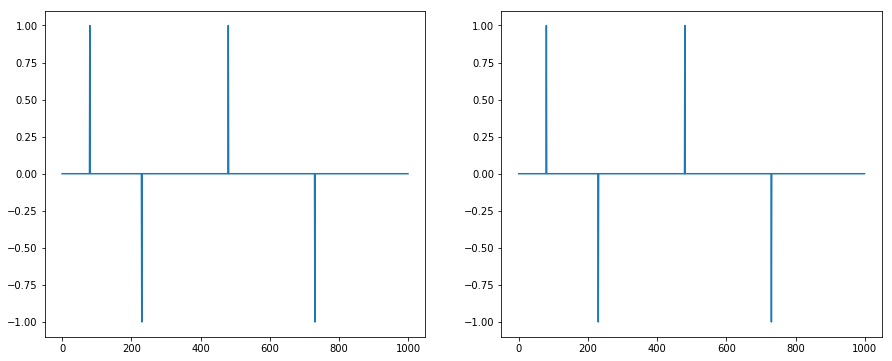

In [151]:
print('Position vraie des instants : ',liste)
print('Estimation de la position des instants par filtre fréquentiel : ', np.where(abs(y_dev1)>0.1))
print('Estimation de la position des instants par filtre temporel : ',np.where(abs(y_dev2)>0.1))
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(np.real(y_dev1))
plt.subplot(122)
plt.plot(y_dev2)
#on observe un décalage de la moitié de la taille de l'impulsion (K/2)

[100 250 500 750]
Estimation de la position des instants par (dé)convolution :  (array([ 80, 230, 480, 730], dtype=int64),)


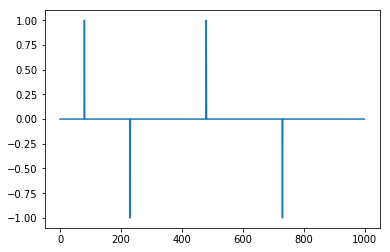

In [152]:
#Deconvolution
y_dev = np.convolve(x,np.fft.ifft(1/h_hat),'full')[:N]
print(liste)
print('Estimation de la position des instants par (dé)convolution : ',np.where(abs(y_dev)>0.1))
plt.plot(y_dev)

<StemContainer object of 3 artists>

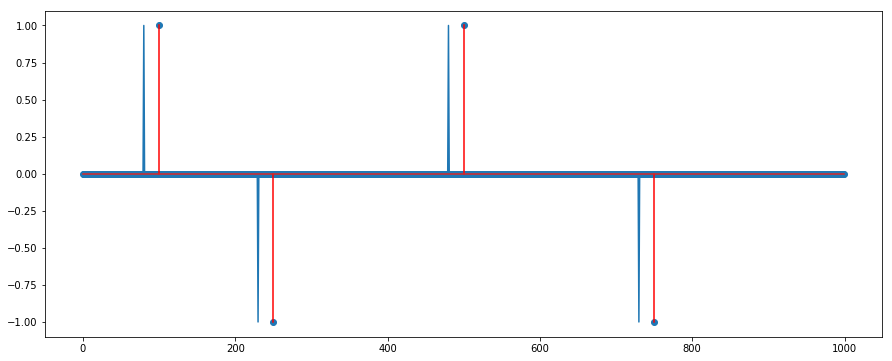

In [153]:
plt.figure(figsize=(15,6))
plt.plot(y_dev)
#plt.plot(np.roll(x_dev,int(K/2)))
plt.stem(y,'r')

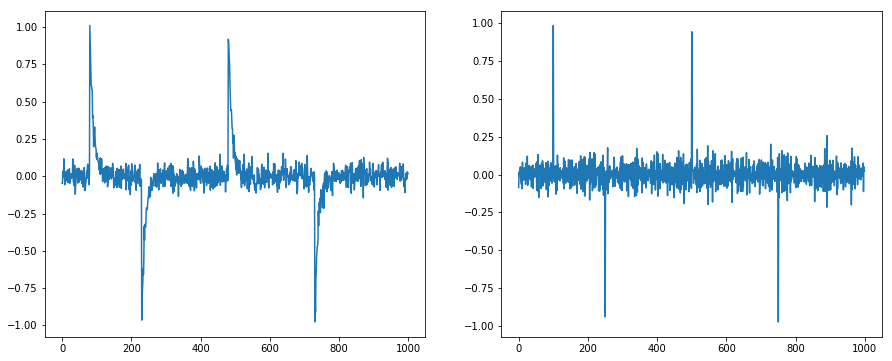

In [156]:
xb = x + np.random.normal(0, 0.05, y.size) #ajout d'un bruit
y_dev = np.fft.ifft(np.fft.fft(xb)/(h_hat))

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(xb)
plt.subplot(122)
plt.plot(np.roll(y_dev,int(K/2)))
#plt.stem(x,'r')

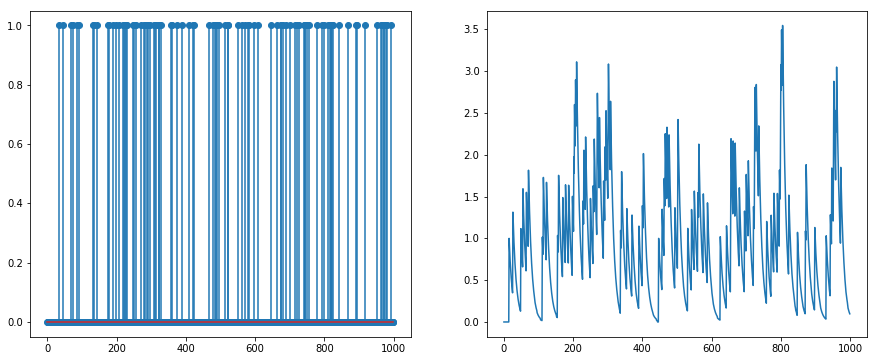

In [157]:
x = np.zeros(N)
P = 100 # nombre d'instants d'impulsion
pos = []
for p in range(P) :
    i = randint(0, N-1)
    pos.append(i)
    
x[pos] = 1
    
y = np.convolve(x,e,'same')

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.stem(x)
plt.subplot(122)
plt.plot(y)

<StemContainer object of 3 artists>

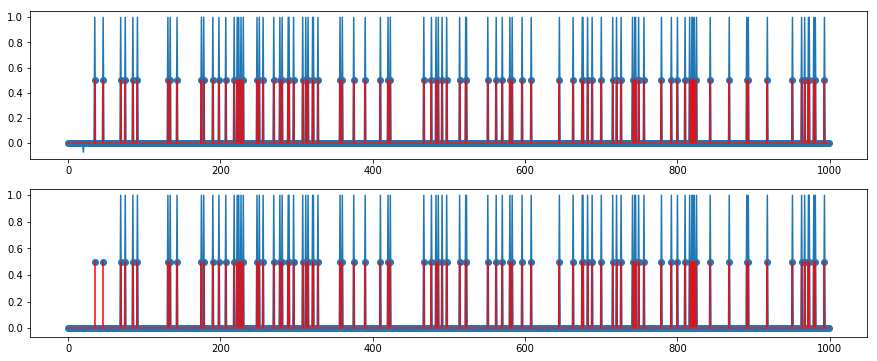

In [158]:
x_dev1 = np.real(np.fft.ifft(np.fft.fft(y)/(h_hat)))
x_dev2 = filtre_derev(y,K)

plt.figure(figsize=(15,6))
plt.subplot(211)
plt.plot(np.roll(x_dev1,int(K/2)))
plt.stem(x/2,'r') #volontairement divisé par deux pour voir la superposition de théorique avec le reconstruit
plt.subplot(212)
plt.plot(np.roll(x_dev2,int(K/2)))
plt.stem(x/2,'r')